In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D, Dropout

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt


import os                   
from re import search        
import shutil               
import natsort               

from PIL import Image       
import tensorflow as tf        
from tqdm import tqdm
import cv2

from tensorflow.keras import layers

In [ ]:
DIR = '/content/drive/MyDrive/Apple_Final/images/orignal_dataset'

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Apple_Final/labels/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Apple_Final/labels/test.csv')

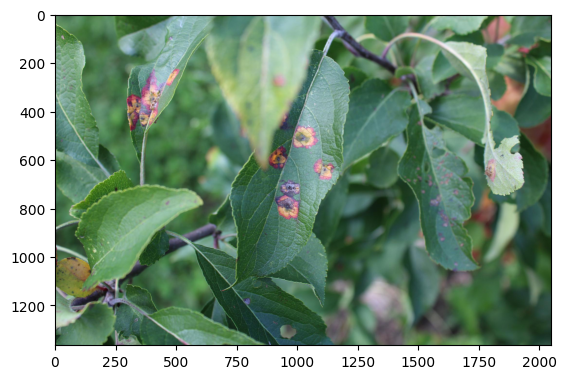

In [ ]:
image1 = Image.open("/content/drive/MyDrive/Apple_Final/images/orignal_dataset/Test_1000.jpg")
plt.imshow(image1)
plt.show()

In [ ]:
train.head()

image_id  healthy  frog_eye  rust  scab
0  Train_0        0         0     0     1
1  Train_1        0         0     0     0
2  Train_2        1         0     0     0
3  Train_3        0         0     1     0
4  Train_4        1         0     0     0

In [ ]:
test.head()

image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4

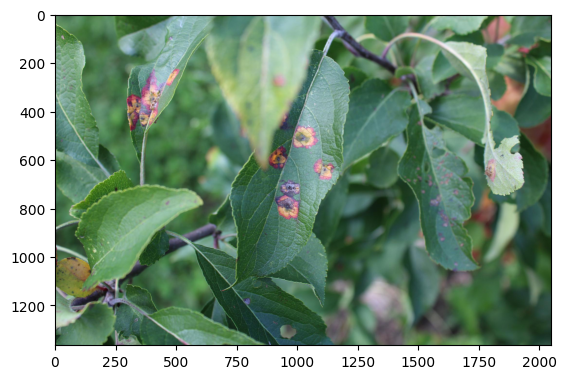

In [ ]:
image1 = Image.open("/content/drive/MyDrive/Apple_Final/images/orignal_dataset/Test_1000.jpg")
plt.imshow(image1)
plt.show()

In [ ]:
class_names = train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'frog_eye', 'rust', 'scab'], dtype='object')


In [ ]:
number = 0
train['label'] = 0

for i in class_names:
    train['label'] = train['label']+train[i]*number
    number = number+1

In [ ]:
train.head()

image_id  healthy  frog_eye  rust  scab  label
0  Train_0        0         0     0     1      3
1  Train_1        0         0     0     0      0
2  Train_2        1         0     0     0      0
3  Train_3        0         0     1     0      2
4  Train_4        1         0     0     0      0

In [ ]:
print(train.tail(10))

        image_id  healthy  frog_eye  rust  scab  label
2364  Train_2364        0         1     0     0      1
2365  Train_2365        0         1     0     0      1
2366  Train_2366        0         1     0     0      1
2367  Train_2367        0         1     0     0      1
2368  Train_2368        0         1     0     0      1
2369  Train_2369        0         1     0     0      1
2370  Train_2370        0         1     0     0      1
2371  Train_2371        0         1     0     0      1
2372  Train_2372        0         1     0     0      1
2373  Train_2373        0         1     0     0      1


In [ ]:
os.listdir(DIR)

['Train_59.jpg',
 'Train_590.jpg',
 'Train_599.jpg',
 'Train_594.jpg',
 'Train_587.jpg',
 'Train_588.jpg',
 'Train_593.jpg',
 'Train_603.jpg',
 'Train_597.jpg',
 'Train_619.jpg',
 'Train_62.jpg',
 'Train_618.jpg',
 'Train_611.jpg',
 'Train_61.jpg',
 'Train_608.jpg',
 'Train_613.jpg',
 'Train_605.jpg',
 'Train_609.jpg',
 'Train_617.jpg',
 'Train_606.jpg',
 'Train_615.jpg',
 'Train_610.jpg',
 'Train_612.jpg',
 'Train_616.jpg',
 'Train_607.jpg',
 'Train_604.jpg',
 'Train_614.jpg',
 'Train_63.jpg',
 'Train_631.jpg',
 'Train_632.jpg',
 'Train_625.jpg',
 'Train_628.jpg',
 'Train_626.jpg',
 'Train_624.jpg',
 'Train_630.jpg',
 'Train_627.jpg',
 'Train_622.jpg',
 'Train_620.jpg',
 'Train_629.jpg',
 'Train_623.jpg',
 'Train_621.jpg',
 'Train_633.jpg',
 'Train_644.jpg',
 'Train_64.jpg',
 'Train_645.jpg',
 'Train_635.jpg',
 'Train_643.jpg',
 'Train_636.jpg',
 'Train_640.jpg',
 'Train_638.jpg',
 'Train_647.jpg',
 'Train_641.jpg',
 'Train_634.jpg',
 'Train_646.jpg',
 'Train_639.jpg',
 'Train_642.jpg

In [ ]:
def get_label_img(img) :
    if search("Train",img):
        img = img.split('.')[0]        
        label = train.loc[train['image_id'] == img]['label']
        return label

In [ ]:
def create_train_data() :
    images = natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label = get_label_img(img)
        path = os.path.join(DIR,img) 
        
        if search("Train",img):
           
            if(img.split("_")[1].split(".")[0]) and label.item() == 0 :   
                shutil.copy(path,'/content/drive/MyDrive/Apple_Final/images/train/healthy')
              
          
            elif((img.split("_")[1].split(".")[0]) and label.item() == 1):
                shutil.copy(path,'/content/drive/MyDrive/Apple_Final/images/train/frog_eye')
            
        
            elif((img.split("_")[1].split(".")[0]) and label.item() == 2):
                shutil.copy(path,'/content/drive/MyDrive/Apple_Final/images/train/rust')
                
  
            elif((img.split("_")[1].split(".")[0]) and label.item() == 3):
                shutil.copy(path,'/content/drive/MyDrive/Apple_Final/images/train/scab')
                
        elif search("Test",img) :
            shutil.copy(path,'/content/drive/MyDrive/Apple_Final/images/test')



In [ ]:
shutil.os.mkdir('/content/drive/MyDrive/Apple_Final/images/train')
shutil.os.mkdir('/content/drive/MyDrive/Apple_Final/images/train/healthy')
shutil.os.mkdir('/content/drive/MyDrive/Apple_Final/images/train/frog_eye')
shutil.os.mkdir('/content/drive/MyDrive/Apple_Final/images/train/rust')
shutil.os.mkdir('/content/drive/MyDrive/Apple_Final/images/train/scab')
shutil.os.mkdir('/content/drive/MyDrive/Apple_Final/images/test')

In [ ]:
train_dir = create_train_data()

100%|██████████| 4195/4195 [03:29<00:00, 20.00it/s]


In [ ]:


base_dir = '/content/drive/MyDrive/Apple_Final/images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

In [ ]:


num_healthy_tr = len(os.listdir(os.path.join(train_dir, 'healthy')))
num_scab_tr = len(os.listdir(os.path.join(train_dir, 'scab')))
num_rust_tr = len(os.listdir(os.path.join(train_dir, 'rust')))
num_multiple_tr = len(os.listdir(os.path.join(train_dir,'frog_eye')))

total_train = num_healthy_tr + num_rust_tr+ num_scab_tr + num_multiple_tr

print("Total Training Dataset Images:",  total_train)
print("Healthy In Training set      : ", num_healthy_tr)
print("Frog_eye In Training         : ", num_multiple_tr)
print("Scab In Training set         : ", num_scab_tr)
print("Rust In Training set         : ", num_rust_tr)


Total Training Dataset Images: 2374
Healthy In Training set      :  607
Frog_eye In Training         :  553
Scab In Training set         :  592
Rust In Training set         :  622


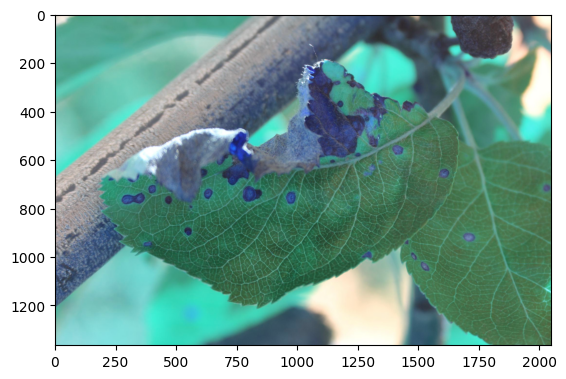

In [ ]:
Train_DIR = '/content/drive/MyDrive/Apple_Final/images/train'              
Categories = ['healthy','frog_eye','rust','scab']


for j in Categories :
    path = os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    break


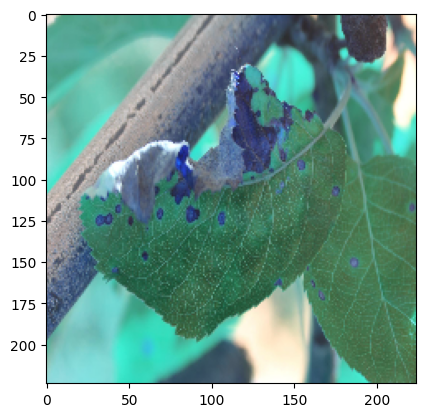

In [ ]:
IMG_SIZE = 224
new_image = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from glob import glob

In [ ]:
batch_size = 32
# IMG_SIZE = 224  ---- already defined

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SIZE,IMG_SIZE)
                                                )

Found 2374 images belonging to 4 classes.


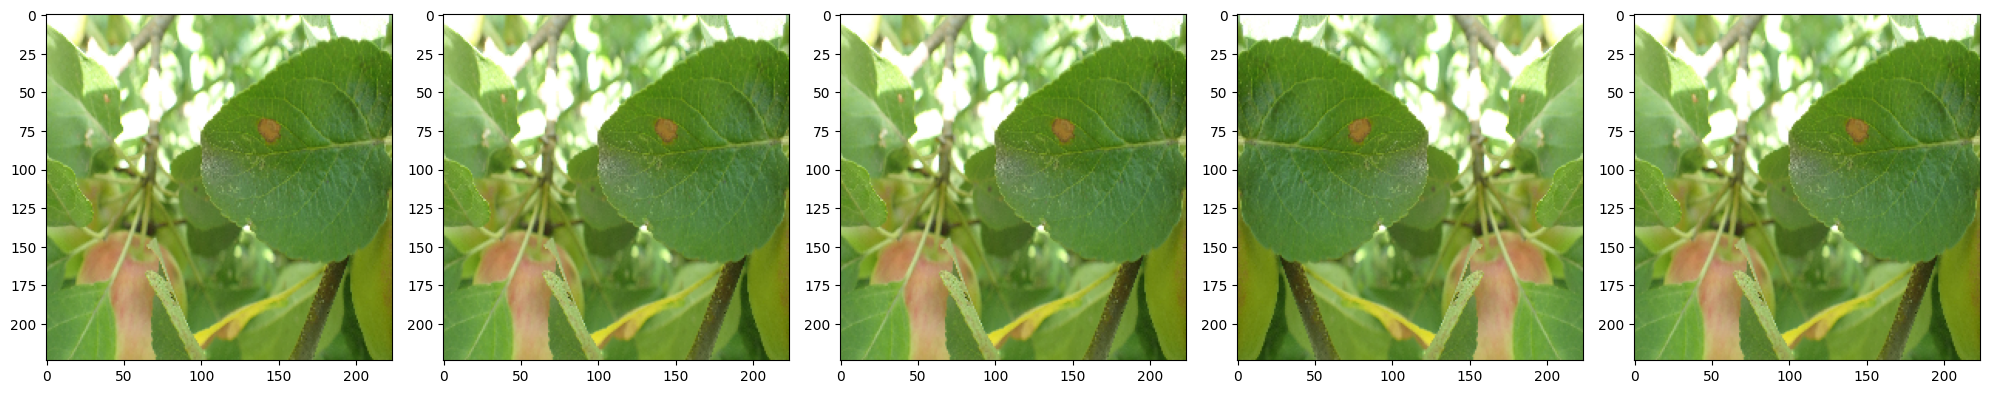

In [ ]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SIZE, IMG_SIZE))

Found 2374 images belonging to 4 classes.


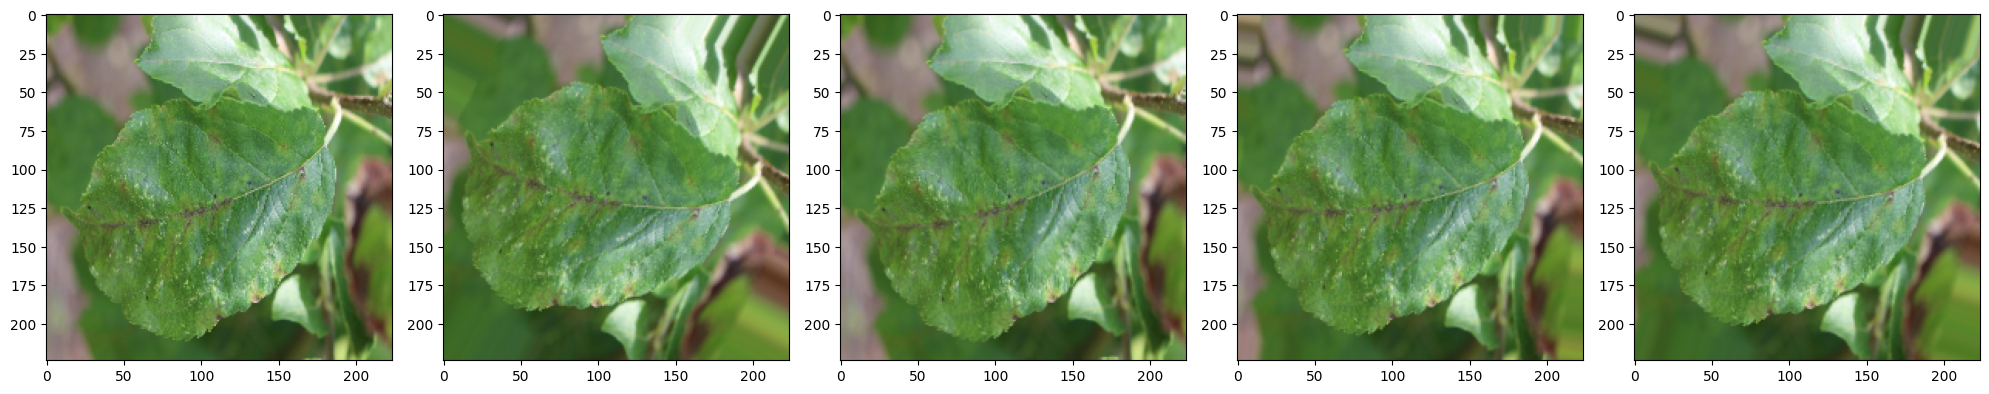

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SIZE, IMG_SIZE)
                                                )

Found 2374 images belonging to 4 classes.


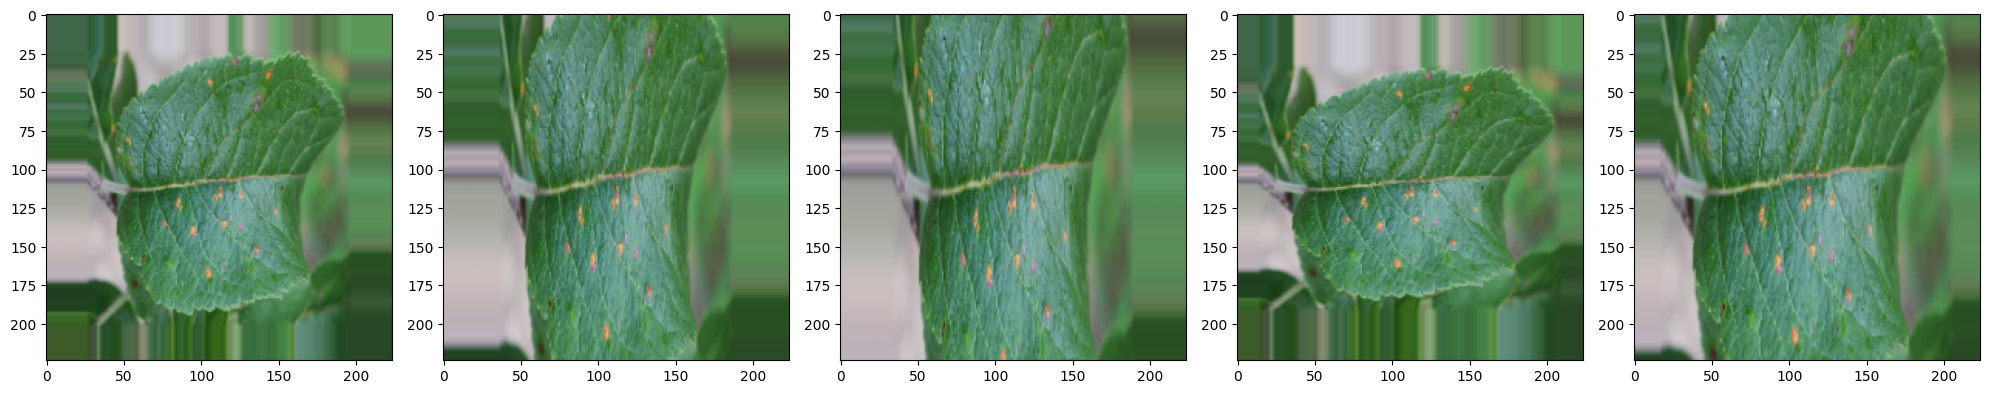

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory('/content/drive/MyDrive/Apple_Final/images/train',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical',
                                          subset = 'training',
                                         
                                          shuffle=True,
                                          color_mode="rgb",
                                          seed=42
                                        )


Found 1901 images belonging to 4 classes.


In [ ]:

val_datagen=datagen.flow_from_directory('/content/drive/MyDrive/Apple_Final/images/train',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical',
                                        subset = 'validation',
                                                                                 
                                          shuffle=False,
                                          color_mode="rgb",
                                          seed=42
                                        )

Found 473 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

## Model with InceptionRestnetV2

In [ ]:
base_model = tf.keras.applications.InceptionResNetV2(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )

219055592/219055592 [==============================] - 10s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False


In [ ]:
folders = glob('/content/drive/MyDrive/Apple_Final/images/train/*')


model = tf.keras.Sequential([
        base_model,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(folders), activation='softmax')
    ])

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 5, 5, 1536)       10752     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

In [ ]:
checkpoint=ModelCheckpoint('/content/drive/MyDrive/Apple_Final/Model/apple_inceptionRestNet50.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [ ]:
r = model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=30,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
  callbacks=callbacks
)

<ipython-input-33-1471192a3c32>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
59/59 [==============================] - ETA: 0s - loss: 1.1852 - accuracy: 0.4805 
Epoch 1: val_loss improved from inf to 0.83875, saving model to /content/drive/MyDrive/Apple_Final/Model/apple_inceptionRestNet50.h5
59/59 [==============================] - 1473s 25s/step - loss: 1.1852 - accuracy: 0.4805 - val_loss: 0.8388 - val_accuracy: 0.6853
Epoch 2/30
59/59 [==============================] - ETA: 0s - loss: 0.7938 - accuracy: 0.6956
Epoch 2: val_loss improved from 0.83875 to 0.63875, saving model to /content/drive/MyDrive/Apple_Final/Model/apple_inceptionRestNet50.h5
59/59 [==============================] - 186s 3s/step - loss: 0.7938 - accuracy: 0.6956 - val_loss: 0.6388 - val_accuracy: 0.7746
Epoch 3/30
59/59 [==============================] - ETA: 0s - loss: 0.6802 - accuracy: 0.7416
Epoch 3: val_loss improved from 0.63875 to 0.59327, saving model to /content/drive/MyDrive/Apple_Final/Model/apple_inceptionRestNet50.h5
59/59 [==============================] - 183s 3s

In [ ]:
model.save("/content/drive/MyDrive/Apple_Final/Model/nc_InceptionResNetV2.h5")

In [ ]:
import pickle
# save the model as a pickle file
with open('/content/drive/MyDrive/Apple_Final/Model/model.pkl', 'wb') as f:
    pickle.dump(model, f)

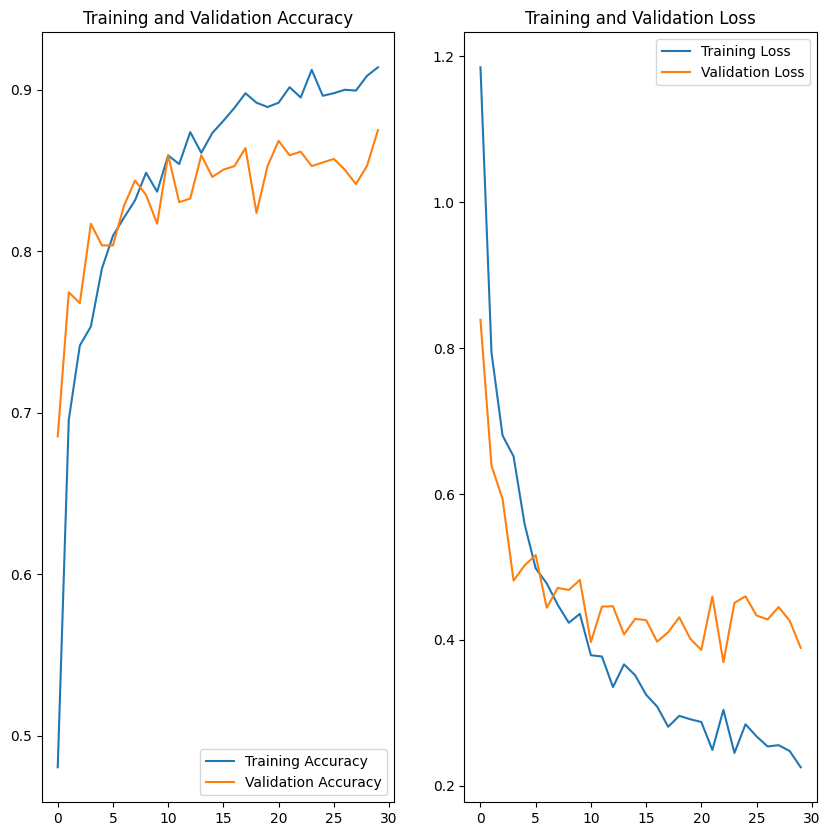

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 2 Xception

In [ ]:
from tensorflow.keras.applications import Xception


IMG_SHAPE = [224, 224]
xception = Xception(input_shape=IMG_SHAPE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in xception.layers:
    layer.trainable = False

folders = glob('/content/drive/MyDrive/Apple_Final/images/train/*')

model = tf.keras.Sequential([
        xception,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(folders), activation='softmax')
    ])

In [ ]:
# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 batch_normalization_102 (Ba  (None, 7, 7, 2048)       14336     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [ ]:
checkpoint=ModelCheckpoint('/content/drive/MyDrive/NEW_CNN_APPLE/Models/Xception.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [ ]:
r = model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=40,
  steps_per_epoch=len(train_datagen),
  validation_steps=len(val_datagen),
  callbacks=callbacks
)

<ipython-input-18-57993adce633>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/40
60/60 [==============================] - ETA: 0s - loss: 1.1178 - accuracy: 0.5055
Epoch 1: val_loss improved from inf to 0.77765, saving model to /content/drive/MyDrive/NEW_CNN_APPLE/Models/Xception.h5
60/60 [==============================] - 705s 11s/step - loss: 1.1178 - accuracy: 0.5055 - val_loss: 0.7777 - val_accuracy: 0.6913
Epoch 2/40
60/60 [==============================] - ETA: 0s - loss: 0.7239 - accuracy: 0.7286
Epoch 2: val_loss improved from 0.77765 to 0.77333, saving model to /content/drive/MyDrive/NEW_CNN_APPLE/Models/Xception.h5
60/60 [==============================] - 176s 3s/step - loss: 0.7239 - accuracy: 0.7286 - val_loss: 0.7733 - val_accuracy: 0.6998
Epoch 3/40
60/60 [==============================] - ETA: 0s - loss: 0.6244 - accuracy: 0.7749
Epoch 3: val_loss improved from 0.77333 to 0.70827, saving model to /content/drive/MyDrive/NEW_CNN_APPLE/Models/Xception.h5
60/60 [==============================] - 181s 3s/step - loss: 0.6244 - accuracy: 0.7749 -

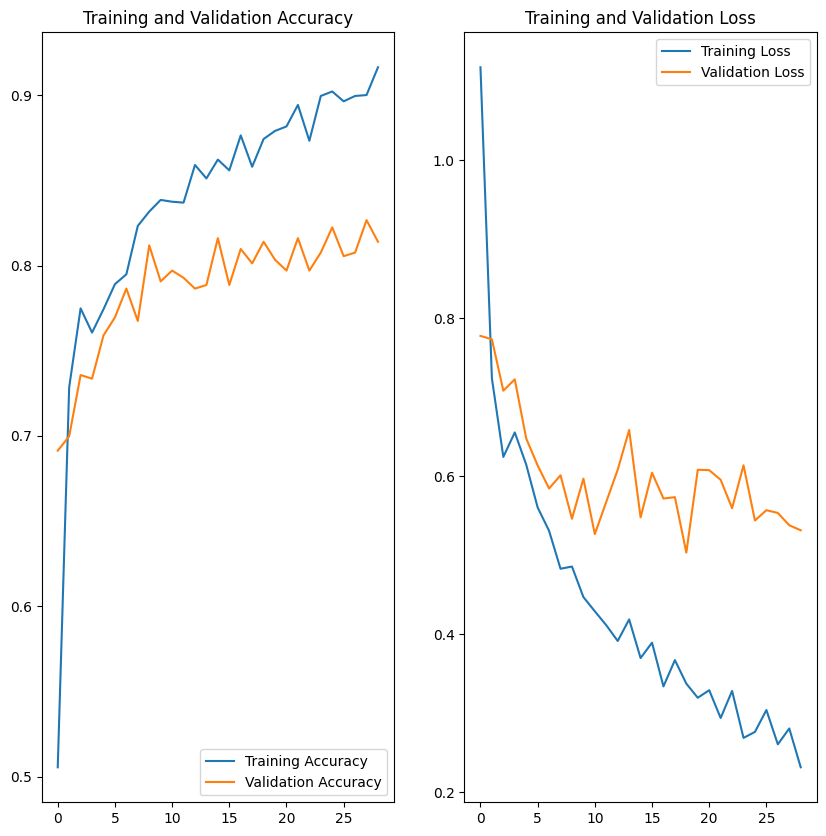

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

epochs_range = range(29)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## MobileNet

In [ ]:
from keras.api._v2.keras.applications import MobileNetV2
from tensorflow.keras.applications import MobileNet


IMG_SHAPE = [224, 224]
base_model = MobileNetV2(input_shape=IMG_SHAPE + [3], weights='imagenet', include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

folders = glob('/content/drive/MyDrive/Apple_Final/images/train/*')

model = tf.keras.Sequential([
        base_model,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(folders), activation='softmax')
    ])

In [ ]:
# Compile the Model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 batch_normalization_104 (Ba  (None, 7, 7, 1280)       8960      
 tchNormalization)                                               
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 512)               655872    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                      

In [ ]:
checkpoint=ModelCheckpoint('/content/drive/MyDrive/Apple_Final/Models/NobileNetV2.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [ ]:
r = model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=40,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
  callbacks=callbacks
)

<ipython-input-29-58fc770d0fee>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/40
59/59 [==============================] - ETA: 0s - loss: 0.5314 - accuracy: 0.8186
Epoch 1: val_loss improved from inf to 0.46201, saving model to /content/drive/MyDrive/Apple_Final/Models/NobileNetV2.h5
59/59 [==============================] - 184s 3s/step - loss: 0.5314 - accuracy: 0.8186 - val_loss: 0.4620 - val_accuracy: 0.8214
Epoch 2/40
59/59 [==============================] - ETA: 0s - loss: 0.4440 - accuracy: 0.8416
Epoch 2: val_loss did not improve from 0.46201
59/59 [==============================] - 172s 3s/step - loss: 0.4440 - accuracy: 0.8416 - val_loss: 0.5151 - val_accuracy: 0.8348
Epoch 3/40
59/59 [==============================] - ETA: 0s - loss: 0.4235 - accuracy: 0.8336
Epoch 3: val_loss improved from 0.46201 to 0.42680, saving model to /content/drive/MyDrive/Apple_Final/Models/NobileNetV2.h5
59/59 [==============================] - 175s 3s/step - loss: 0.4235 - accuracy: 0.8336 - val_loss: 0.4268 - val_accuracy: 0.8415
Epoch 4/40
59/59 [=================

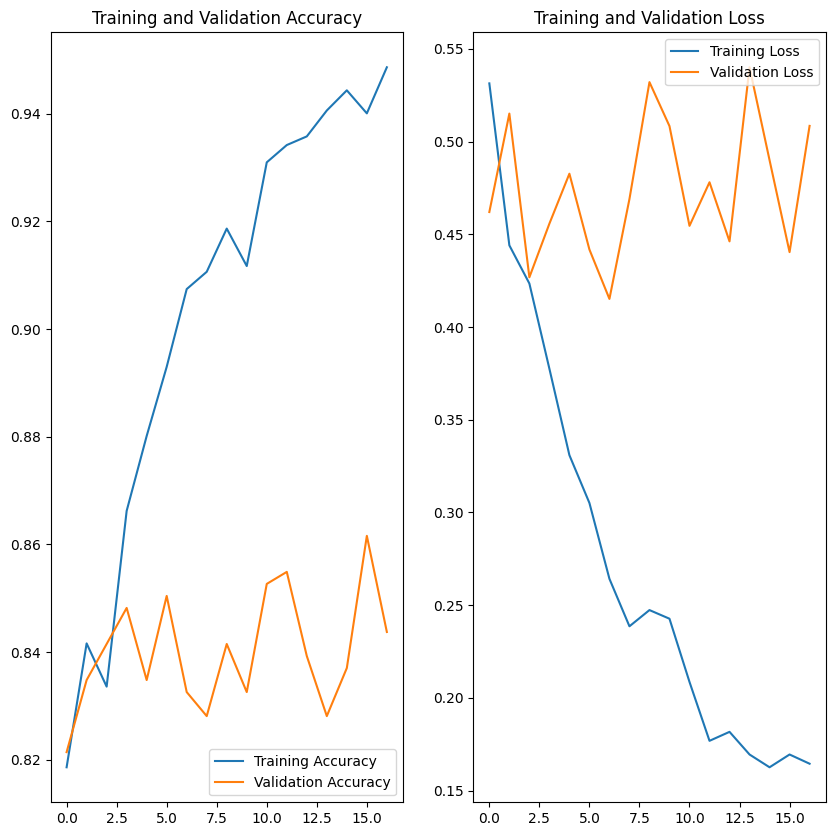

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

epochs_range = range(17)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()